In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
df = pd.read_csv("Telecom Customer Churn Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display the size of the dataset
df.shape

(7043, 21)

In [4]:
# Display basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check how many churn and non-churn customers are there
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Display statistics summary of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


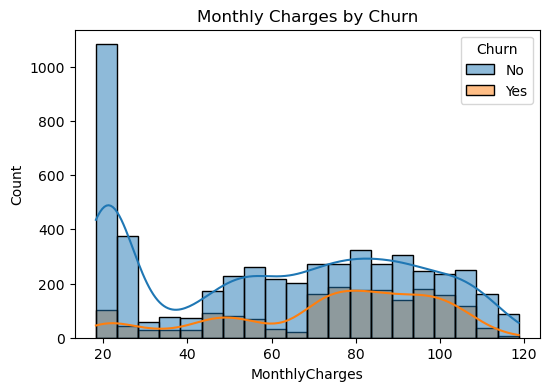

In [8]:
# Plot monthly charges for churn and non-churn customers
if 'MonthlyCharges' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(x='MonthlyCharges', data=df, hue='Churn', kde=True, bins=20)
    plt.title('Monthly Charges by Churn')
    plt.show()

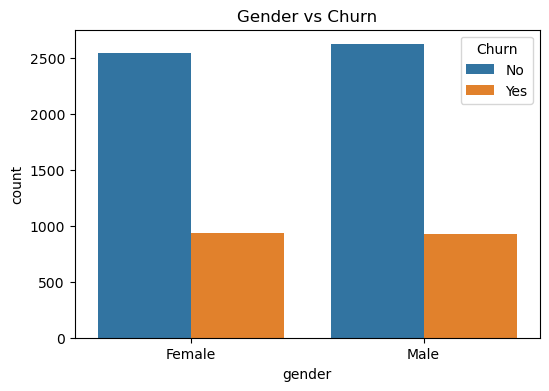

In [9]:
# Plot churn count for male and female customers
if 'gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='gender', hue='Churn', data=df)
    plt.title('Gender vs Churn')
    plt.show()

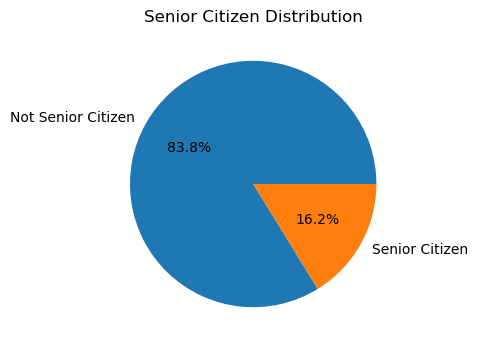

In [10]:
# Plot Senior Citizen Distribution
if 'SeniorCitizen' in df.columns:
    values=df['SeniorCitizen'].value_counts()
    plt.figure(figsize=(6,4))
    plt.pie(values, labels=['Not Senior Citizen', 'Senior Citizen'], autopct='%1.1f%%')
    plt.title('Senior Citizen Distribution')
    plt.show()

In [11]:
# Convert churn values into numeric form
df_LE = LabelEncoder()
df['Churn'] = df_LE.fit_transform(df['Churn'])

In [12]:
# Convert categorical columns into numeric form
df = pd.get_dummies(df, drop_first=True)

In [13]:
# Separate features and target column
X = df.drop('Churn', axis=1)
y = df['Churn']

In [14]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [16]:
# Check class balance before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE:
 Churn
0    4139
1    4139
Name: count, dtype: int64


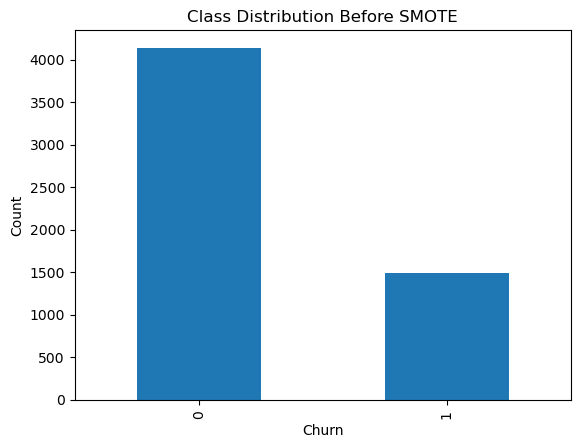

In [17]:
# Plot class distribution before SMOTE
y_train.value_counts().plot(kind='bar')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

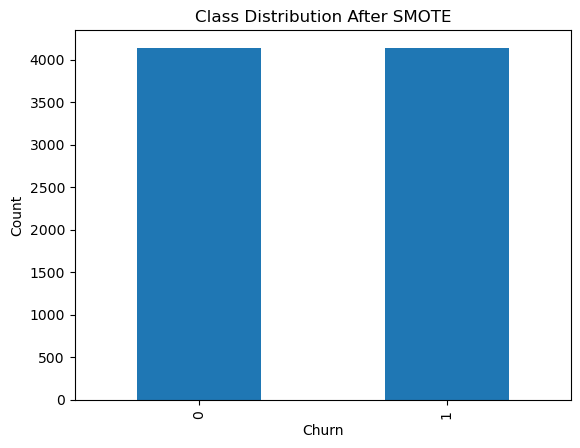

In [18]:
# Plot class distribution after SMOTE
y_train_res.value_counts().plot(kind='bar')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [19]:
# Train logistic regression model
LogR_model = LogisticRegression(max_iter=2000, random_state=42)
LogR_model.fit(X_train_res, y_train_res)
y_pred_LogR = LogR_model.predict(X_test)

In [20]:
# Check performance of logistic regression model
print("\n Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_LogR))
print(classification_report(y_test, y_pred_LogR))
print("Accuracy:", accuracy_score(y_test, y_pred_LogR))


 Logistic Regression Results:
[[892 143]
 [166 208]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.56      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

Accuracy: 0.7806955287437899


In [21]:
# Train random forest model
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train_res, y_train_res)
y_pred_RF = RF_model.predict(X_test)

In [22]:
# Check performance of random forest model
print("Random Forest Classifier Results:")
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print("Accuracy:", accuracy_score(y_test, y_pred_RF))

Random Forest Classifier Results:
[[899 136]
 [164 210]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.56      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.78708303761533


In [23]:
# Train XGBoost model
XGB_model = XGBClassifier(random_state=42, eval_metric='logloss')
XGB_model.fit(X_train_res, y_train_res)
y_pred_XGB = XGB_model.predict(X_test)

In [24]:
# Check performance of XGBoost model
print("XGBoost Classifier Results:")
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))
print("Accuracy:", accuracy_score(y_test, y_pred_XGB))

XGBoost Classifier Results:
[[863 172]
 [143 231]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Accuracy: 0.7764371894960965


In [25]:
# Find best parameters for logistic regression model
LR_params = {'C':[0.1, 1, 10], 'max_iter':[2000, 3000]}
LR_grid = GridSearchCV(LogisticRegression(random_state=42), LR_params, cv=3)
LR_grid.fit(X_train_res, y_train_res)

print("Best Logistic Regression Params:", LR_grid.best_params_)

Best Logistic Regression Params: {'C': 10, 'max_iter': 2000}


In [26]:
# Test tuned logistic regression model
best_LR = LR_grid.best_estimator_
y_pred_LR_tuned = best_LR.predict(X_test)

print("Tuned Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_LR_tuned))
print(classification_report(y_test, y_pred_LR_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_LR_tuned))

Tuned Logistic Regression Results:
[[918 117]
 [178 196]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7906316536550745


In [27]:
# Find best parameters for random forest model
RF_params = {'n_estimators':[100, 200], 'max_depth':[5, 10, None]}
RF_grid = GridSearchCV(RandomForestClassifier(random_state=42), RF_params, cv=3)
RF_grid.fit(X_train_res, y_train_res)

print("Best Random Forest Params:", RF_grid.best_params_)

Best Random Forest Params: {'max_depth': None, 'n_estimators': 200}


In [28]:
# Test tuned random forest model
Best_RF = RF_grid.best_estimator_
y_pred_RF_tuned = Best_RF.predict(X_test)

print("Tuned Random Forest Results:")
print(confusion_matrix(y_test, y_pred_RF_tuned))
print(classification_report(y_test, y_pred_RF_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_RF_tuned))

Tuned Random Forest Results:
[[902 133]
 [163 211]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.56      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Accuracy: 0.7899219304471257


In [29]:
# Find best parameters for XGBoost model
XGB_params = {'n_estimators':[100, 200], 'max_depth':[3, 5]}
XGB_grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), XGB_params, cv=3)
XGB_grid.fit(X_train_res, y_train_res)

print("Best XGBoost Params:", XGB_grid.best_params_)

Best XGBoost Params: {'max_depth': 5, 'n_estimators': 200}


In [30]:
# Test tuned XGBoost model
Best_XGB = XGB_grid.best_estimator_
y_pred_XGB_tuned = Best_XGB.predict(X_test)

print("Tuned XGBoost Results:")
print(confusion_matrix(y_test, y_pred_XGB_tuned))
print(classification_report(y_test, y_pred_XGB_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_XGB_tuned))

Tuned XGBoost Results:
[[869 166]
 [151 223]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.60      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Accuracy: 0.7750177430801988
